# 1. Data loading and cleaning.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt

plt.style.use('seaborn')

In [2]:
#load dataset into dataframe.
df = pd.read_csv("Electronics_Product_Sale.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
#Having a look at shape of dataset.
df.shape

(373700, 6)

In [4]:
#Having a look at data type of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


* Here we can see Order ID, Quantity of order, Price and Order date has object datatype.

In [5]:
#Having a look at null values inside the dataset.
df.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

* As we can see there are so many null values are present inside our dataset.

In [6]:
#Missing value present inside the data is 0.29%.
#Removing missing values.
df.dropna(inplace = True)

In [7]:
#Having a look at null values inside the dataset now.
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
#Converting Date into datetime format.
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [9]:
#Having a look at data type of dataset Now.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          372610 non-null  object        
 1   Product           372610 non-null  object        
 2   Quantity Ordered  372610 non-null  object        
 3   Price Each        372610 non-null  object        
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  372610 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 19.9+ MB


In [10]:
#Converting order date into date. 
df['day'] = df['Order Date'].dt.day

#Converting order date into date. 
df['month'] = df['Order Date'].dt.month

#Converting order date into date. 
df['year'] = df['Order Date'].dt.year

#Converting order date into hour. 
df['hour'] = df['Order Date'].dt.hour

#Converting order date into min. 
df['minute'] = df['Order Date'].dt.minute

In [11]:
#droping order date.
df.drop('Order Date',axis = True, inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute
0,141234,iPhone,1,700,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0


In [12]:
#Converting Order ID into numeric datatype format.
df['Order ID'] = pd.to_numeric(df['Order ID'],errors='coerce')

#Converting Quantity Ordered into numeric datatype format.
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')

#Converting Quantity Ordered into numeric datatype format.
df['Price Each'] = pd.to_numeric(df['Price Each'],errors='coerce')

In [13]:
#Having a look at data type of dataset Now.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  float64
 1   Product           372610 non-null  object 
 2   Quantity Ordered  371900 non-null  float64
 3   Price Each        371900 non-null  float64
 4   Purchase Address  372610 non-null  object 
 5   day               371900 non-null  float64
 6   month             371900 non-null  float64
 7   year              371900 non-null  float64
 8   hour              371900 non-null  float64
 9   minute            371900 non-null  float64
dtypes: float64(8), object(2)
memory usage: 31.3+ MB


In [14]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0


In [15]:
#Spliting city from purchase address.
df['City']= df['Purchase Address'].str.split(',').str.get(1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin


# 4. What is the distribution of sales among different cities in different months?
*    Which city had the highest sales overall?
*    Which Month had the highest amount of sales overall?
*    Most bought products per city.

In [16]:
#Multipling quantity order and each price to form total amount(sale).
df['Total amount'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [17]:
#The distribution of sales among different cities in different months.
pd.pivot_table(index = 'month',
               columns = 'City',
               values = 'Total amount',
              data = df,
              aggfunc = sum)

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
month,,,,,,,,,
1.0,298319.08,176174.12,402176.98,286925.02,577203.80,521182.58,229971.12,871176.66,281384.10
2.0,352940.60,217574.80,429616.72,373335.98,684123.32,610744.52,298903.72,1094144.68,342660.50
3.0,463810.76,309098.54,602047.62,444753.36,859858.74,734524.40,374416.02,1387453.92,438237.40
4.0,568897.82,345367.18,707614.22,502720.96,1100528.04,898895.50,479956.24,1624852.38,552508.14
5.0,477707.98,321270.44,657607.30,536912.98,999378.42,872252.80,463416.02,1553358.98,423308.58
6.0,439632.94,288114.58,509495.78,373771.50,903063.86,648297.16,339174.70,1226346.96,427707.04
7.0,423532.94,300649.86,582994.28,424650.34,788669.28,711432.20,352831.26,1285763.52,425027.84
8.0,338535.32,251427.22,478550.52,359526.92,691787.00,606366.92,305755.48,1077556.20,379430.18
9.0,342557.78,212967.40,496817.46,328425.72,708151.38,601127.66,265142.88,927191.44,312738.54


<Figure size 720x720 with 0 Axes>

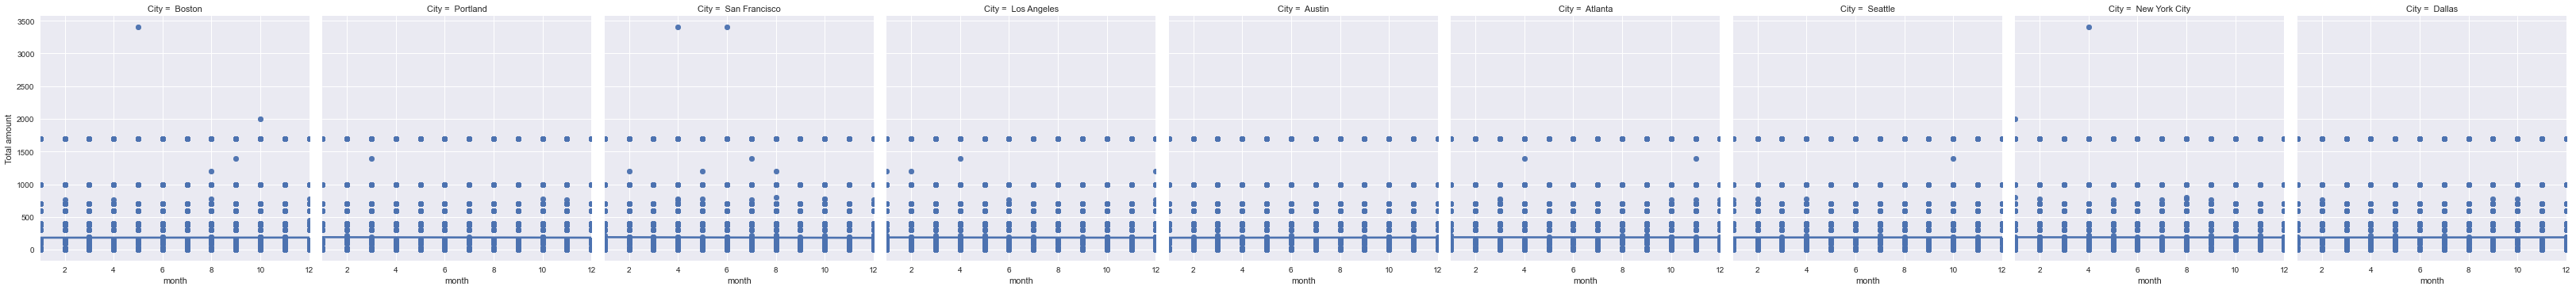

In [18]:
#Visualizing the distribution of sales among different cities in different months.
plt.figure(figsize = (10,10))
sns.lmplot(x = 'month',y = 'Total amount', data = df , col = 'City')

* The distribution of sale among different cities seems like almost same.

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [20]:
#Which city has the highest sales overall.

In [21]:
#To find highest overall sale per city. 
#Here I am using group by function with max aggregation.
g_city = df.groupby(['City'])['Total amount'].sum()
g_city

City
 Atlanta          5.590997e+06
 Austin           3.639164e+06
 Boston           7.323284e+06
 Dallas           5.535951e+06
 Los Angeles      1.090514e+07
 New York City    9.328635e+06
 Portland         4.640981e+06
 San Francisco    1.652441e+07
 Seattle          5.495511e+06
Name: Total amount, dtype: float64

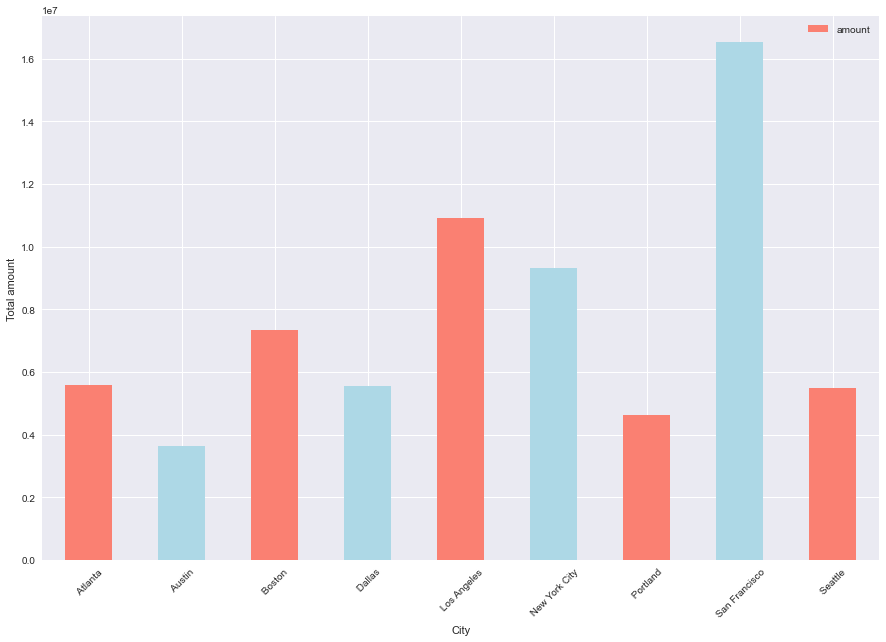

In [22]:
#Visualization.
g_city.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total amount')
plt.legend(['amount'])
plt.xticks(rotation = 45);

* It seems like " San Francisco " city has the highest overall sales.

In [23]:
#Which Month had the highest amount of sales overall?

In [24]:
#To find highest overall sale per month. 
#Here I am using group by function with max aggregation.
g_month = df.groupby(['month'])['Total amount'].sum()
g_month

month
1.0     3.644513e+06
2.0     4.404045e+06
3.0     5.614201e+06
4.0     6.781340e+06
5.0     6.305214e+06
6.0     5.155605e+06
7.0     5.295552e+06
8.0     4.488936e+06
9.0     4.195120e+06
10.0    7.473454e+06
11.0    6.399206e+06
12.0    9.226887e+06
Name: Total amount, dtype: float64

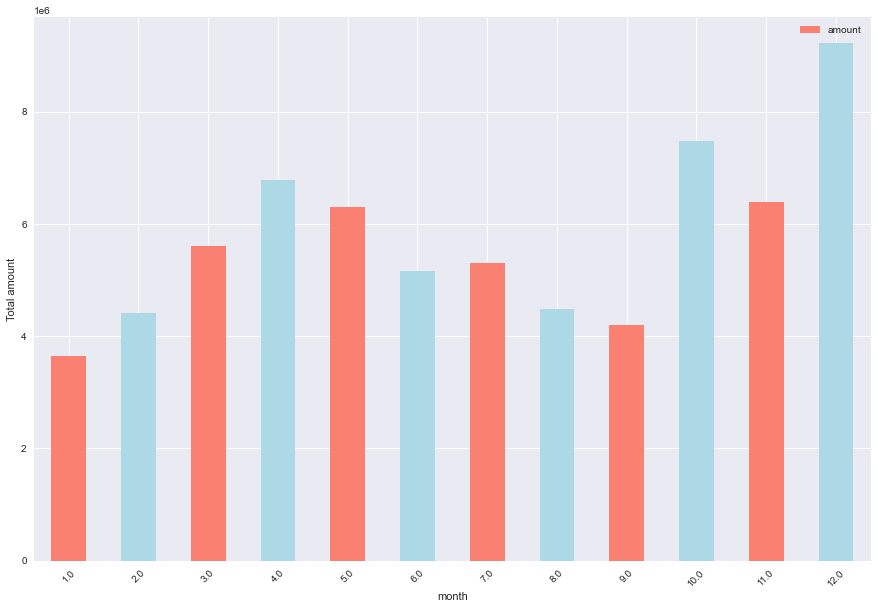

In [25]:
#Visualization.
g_month.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total amount')
plt.legend(['amount'])
plt.xticks(rotation = 45);

* It seems like last month of the year has highest overall sales.

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [27]:
#Most bought products per city.
c_tab = pd.crosstab(df['City'],df['Product'].max())
c_tab

col_0,iPhone
City,
Atlanta,29762
Austin,19810
Boston,39868
Dallas,29640
Los Angeles,59210
New York City,49752
Portland,24930
San Francisco,89464
Seattle,29464


* It seems like iphone is the most bought product in all city.

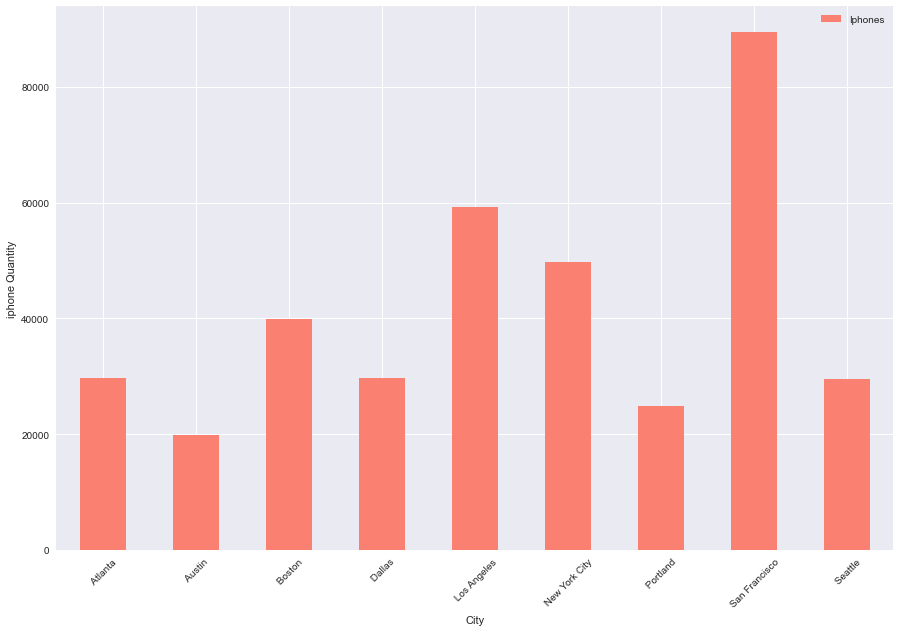

In [28]:
#Visualization.
c_tab.plot(kind = 'bar',figsize = (15,10),color = ['salmon'])
plt.ylabel('iphone Quantity')
plt.legend(['Iphones'])
plt.xticks(rotation = 45);

* Based on this we can say that " San Francisco " city had sold highest iphone.

* Based on my analysis, " San Francisco " is the best city to establishing a new branch for the retail store.
* Since " San Francisco " city providing highest sale as compare to other city.

# 5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;
* What products are mostly sold at different times of the day?
* Which time of day has the most sales?

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


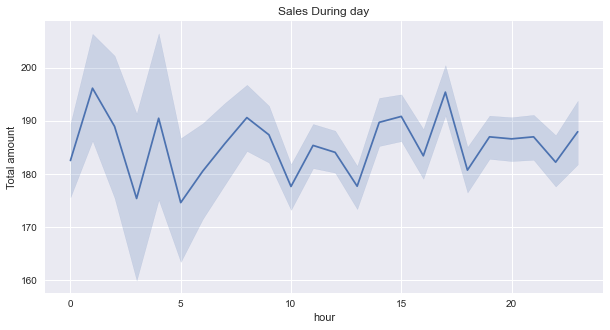

In [30]:
#visualizing sales distribution during daytime.
plt.figure(figsize = (10,5))
sns.lineplot(x = df["hour"], y = df["Total amount"])
plt.title('Sales During day');

In [31]:
#What products are mostly sold in day?
day_sale = df.groupby('Product')['Quantity Ordered'].max()
day_sale

Product
20in Monitor                  2.0
27in 4K Gaming Monitor        2.0
27in FHD Monitor              2.0
34in Ultrawide Monitor        2.0
AA Batteries (4-pack)         7.0
AAA Batteries (4-pack)        9.0
Apple Airpods Headphones      3.0
Bose SoundSport Headphones    3.0
Flatscreen TV                 2.0
Google Phone                  2.0
LG Dryer                      1.0
LG Washing Machine            1.0
Lightning Charging Cable      4.0
Macbook Pro Laptop            2.0
Product                       NaN
ThinkPad Laptop               2.0
USB-C Charging Cable          6.0
Vareebadd Phone               2.0
Wired Headphones              4.0
iPhone                        2.0
Name: Quantity Ordered, dtype: float64

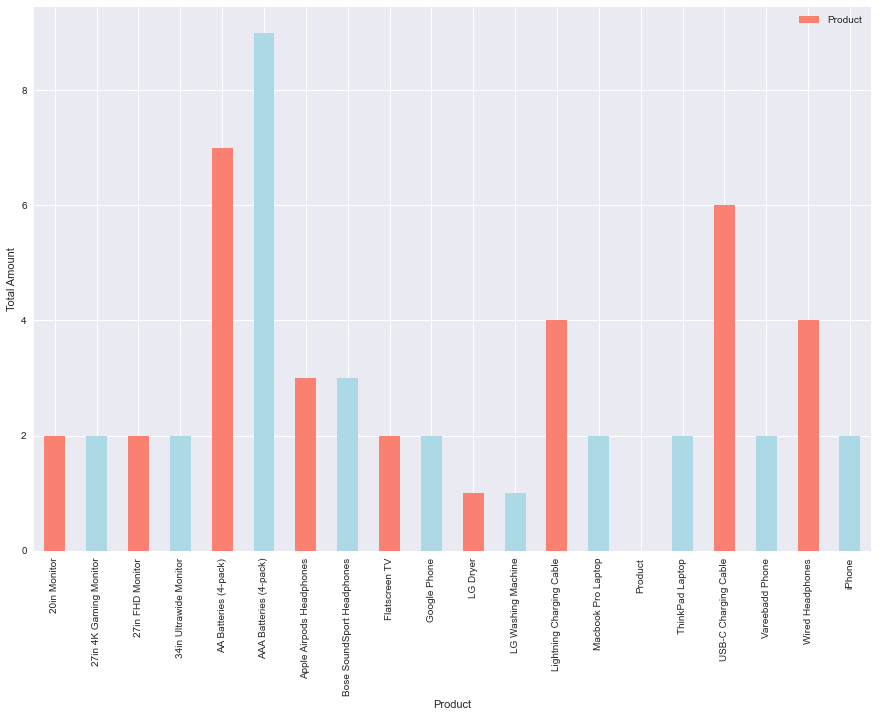

In [32]:
#Visualization.
day_sale.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total Amount')
plt.legend(['Product'])
plt.xticks(rotation = 90);

In [33]:
#spliting the dataset into morning.
morning= df[(df['hour'] > 6.0) & (df['hour'] < 12.0)].replace('morning')
morning.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99
8,141242.0,Bose SoundSport Headphones,1.0,99.99,"867 Willow St, Los Angeles, CA 90001",1.0,1.0,2019.0,10.0,30.0,Los Angeles,99.99
10,141244.0,Apple Airpods Headphones,1.0,150.00,"492 Walnut St, San Francisco, CA 94016",7.0,1.0,2019.0,11.0,29.0,San Francisco,150.00
11,141245.0,Macbook Pro Laptop,1.0,1700.00,"322 6th St, San Francisco, CA 94016",31.0,1.0,2019.0,10.0,12.0,San Francisco,1700.00
16,141250.0,Vareebadd Phone,1.0,400.00,"471 Center St, Los Angeles, CA 90001",10.0,1.0,2019.0,11.0,20.0,Los Angeles,400.00


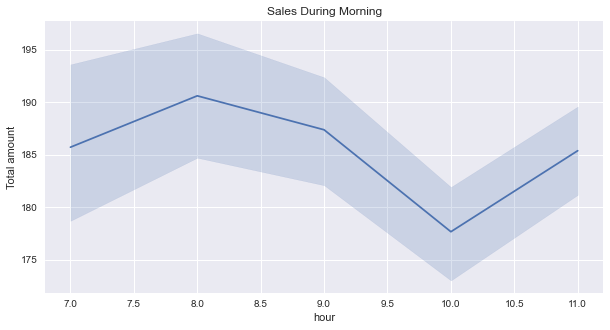

In [34]:
#visualizing sales distribution during morning.
plt.figure(figsize = (10,5))
sns.lineplot(x = morning["hour"], y = morning["Total amount"])
plt.title('Sales During Morning');

In [35]:
#What products are mostly sold in morning?
morning_sale = morning.groupby('Product')['Quantity Ordered'].max()
morning_sale

Product
20in Monitor                  2.0
27in 4K Gaming Monitor        2.0
27in FHD Monitor              2.0
34in Ultrawide Monitor        2.0
AA Batteries (4-pack)         6.0
AAA Batteries (4-pack)        9.0
Apple Airpods Headphones      2.0
Bose SoundSport Headphones    2.0
Flatscreen TV                 2.0
Google Phone                  2.0
LG Dryer                      1.0
LG Washing Machine            1.0
Lightning Charging Cable      3.0
Macbook Pro Laptop            2.0
ThinkPad Laptop               1.0
USB-C Charging Cable          4.0
Vareebadd Phone               1.0
Wired Headphones              4.0
iPhone                        2.0
Name: Quantity Ordered, dtype: float64

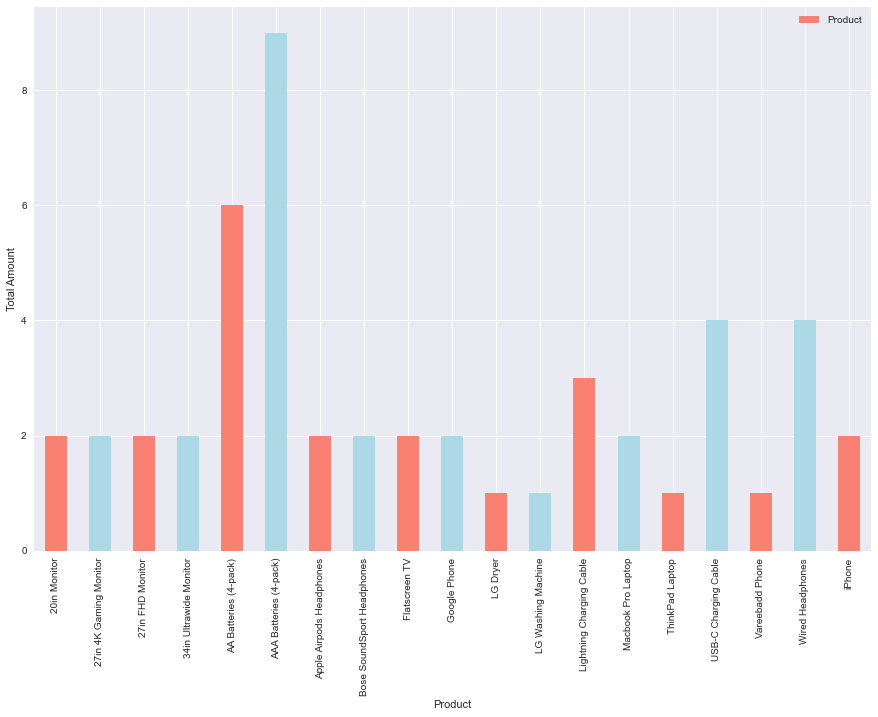

In [36]:
#Visualization.
morning_sale.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total Amount')
plt.legend(['Product'])
plt.xticks(rotation = 90);

* AAA Batteries are mostly sold product in morning.

In [37]:
#spliting the dataset into afternoon.
afternoon = df[(df['hour'] > 12.0) & (df['hour'] < 18.0)]
afternoon

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
15,141249.0,27in FHD Monitor,1.0,149.99,"440 Cedar St, Portland, OR 97035",5.0,1.0,2019.0,17.0,20.0,Portland,149.99
25,141259.0,AAA Batteries (4-pack),2.0,2.99,"920 Adams St, San Francisco, CA 94016",20.0,1.0,2019.0,17.0,26.0,San Francisco,5.98
31,141265.0,Apple Airpods Headphones,1.0,150.00,"853 Ridge St, Boston, MA 02215",1.0,1.0,2019.0,16.0,52.0,Boston,150.00
...,...,...,...,...,...,...,...,...,...,...,...,...
373691,259350.0,Google Phone,1.0,600.00,"519 Maple St, San Francisco, CA 94016",30.0,9.0,2019.0,13.0,49.0,San Francisco,600.00
373692,259350.0,USB-C Charging Cable,1.0,11.95,"519 Maple St, San Francisco, CA 94016",30.0,9.0,2019.0,13.0,49.0,San Francisco,11.95
373694,259352.0,USB-C Charging Cable,1.0,11.95,"976 Forest St, San Francisco, CA 94016",7.0,9.0,2019.0,15.0,49.0,San Francisco,11.95
373696,259354.0,iPhone,1.0,700.00,"216 Dogwood St, San Francisco, CA 94016",1.0,9.0,2019.0,16.0,0.0,San Francisco,700.00


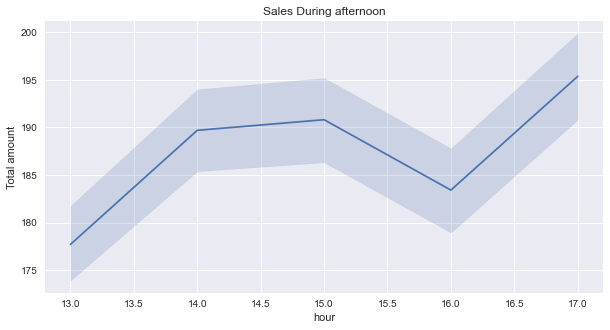

In [38]:
#visualizing sales distribution during afternoon.
plt.figure(figsize = (10,5))
sns.lineplot(x = afternoon["hour"], y = afternoon["Total amount"])
plt.title('Sales During afternoon');

In [39]:
#What products are mostly sold in Afternoon?
afternoon_sale = afternoon.groupby('Product')['Quantity Ordered'].max()
afternoon_sale

Product
20in Monitor                  2.0
27in 4K Gaming Monitor        2.0
27in FHD Monitor              2.0
34in Ultrawide Monitor        2.0
AA Batteries (4-pack)         7.0
AAA Batteries (4-pack)        8.0
Apple Airpods Headphones      2.0
Bose SoundSport Headphones    2.0
Flatscreen TV                 2.0
Google Phone                  2.0
LG Dryer                      1.0
LG Washing Machine            1.0
Lightning Charging Cable      4.0
Macbook Pro Laptop            2.0
ThinkPad Laptop               2.0
USB-C Charging Cable          4.0
Vareebadd Phone               2.0
Wired Headphones              4.0
iPhone                        2.0
Name: Quantity Ordered, dtype: float64

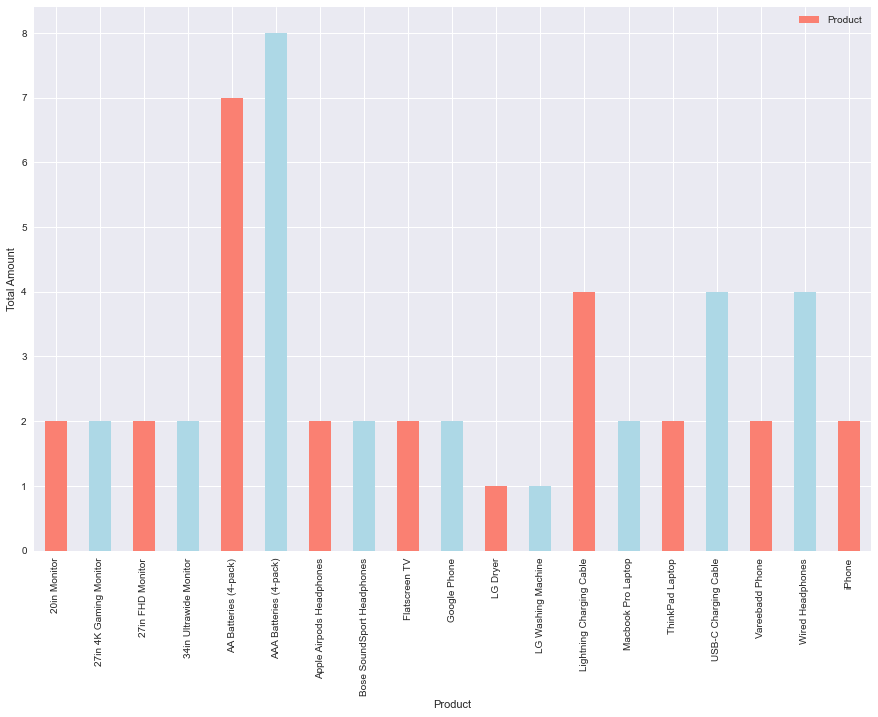

In [40]:
#Visualization.
afternoon_sale.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total Amount')
plt.legend(['Product'])
plt.xticks(rotation = 90);

* AAA Batteries are mostly sold product in afternoon also.

In [41]:
#spliting the dataset into evening.
evening = df[(df['hour'] > 18.0) & (df['hour'] < 24.0)]
evening

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
5,141239.0,AAA Batteries (4-pack),1.0,2.99,"775 Willow St, San Francisco, CA 94016",29.0,1.0,2019.0,20.0,22.0,San Francisco,2.99
9,141243.0,Apple Airpods Headphones,1.0,150.00,"657 Johnson St, San Francisco, CA 94016",22.0,1.0,2019.0,21.0,20.0,San Francisco,150.00
13,141247.0,27in FHD Monitor,1.0,149.99,"512 Wilson St, San Francisco, CA 94016",25.0,1.0,2019.0,19.0,19.0,San Francisco,149.99
...,...,...,...,...,...,...,...,...,...,...,...,...
373686,259345.0,ThinkPad Laptop,1.0,999.99,"406 Dogwood St, San Francisco, CA 94016",21.0,9.0,2019.0,23.0,12.0,San Francisco,999.99
373689,259348.0,Lightning Charging Cable,1.0,14.95,"260 Spruce St, Boston, MA 02215",30.0,9.0,2019.0,21.0,3.0,Boston,14.95
373690,259349.0,AAA Batteries (4-pack),1.0,2.99,"911 River St, Dallas, TX 75001",1.0,9.0,2019.0,22.0,14.0,Dallas,2.99
373693,259351.0,Apple Airpods Headphones,1.0,150.00,"981 4th St, New York City, NY 10001",1.0,9.0,2019.0,19.0,43.0,New York City,150.00


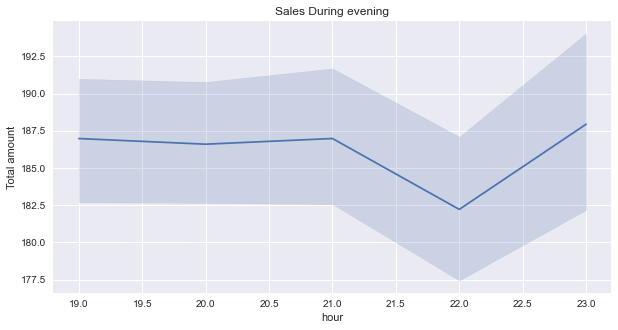

In [42]:
#visualizing sales distribution during evening.
plt.figure(figsize = (10,5))
sns.lineplot(x = evening["hour"], y = evening["Total amount"])
plt.title('Sales During evening');

In [43]:
#What products are mostly sold in evening?
evening_sale = evening.groupby('Product')['Quantity Ordered'].max()
evening_sale

Product
20in Monitor                  2.0
27in 4K Gaming Monitor        2.0
27in FHD Monitor              2.0
34in Ultrawide Monitor        2.0
AA Batteries (4-pack)         7.0
AAA Batteries (4-pack)        9.0
Apple Airpods Headphones      3.0
Bose SoundSport Headphones    3.0
Flatscreen TV                 2.0
Google Phone                  2.0
LG Dryer                      1.0
LG Washing Machine            1.0
Lightning Charging Cable      4.0
Macbook Pro Laptop            2.0
ThinkPad Laptop               1.0
USB-C Charging Cable          6.0
Vareebadd Phone               2.0
Wired Headphones              4.0
iPhone                        2.0
Name: Quantity Ordered, dtype: float64

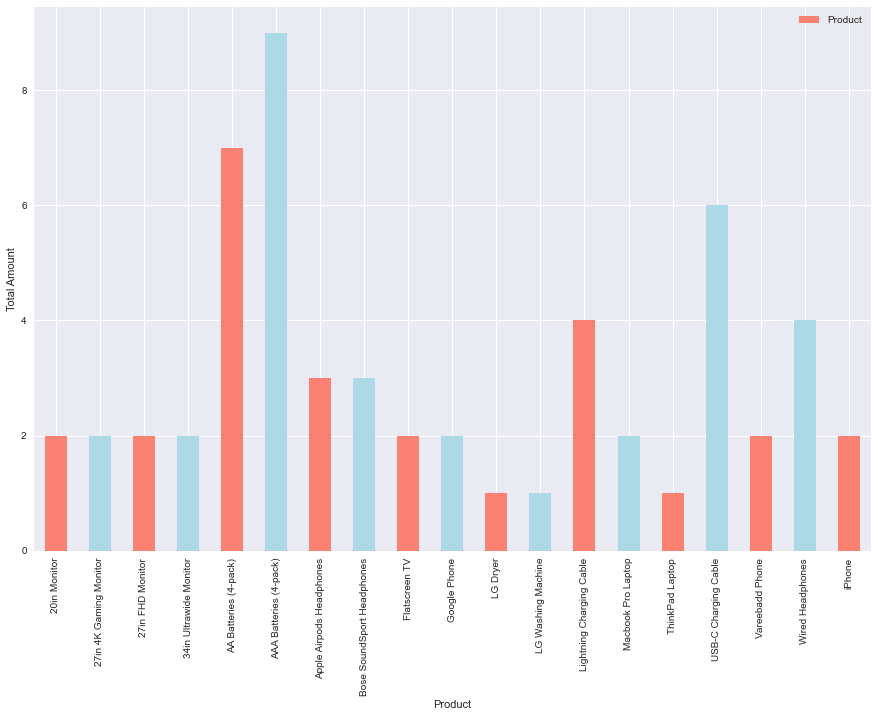

In [44]:
#Visualization.
evening_sale.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total Amount')
plt.legend(['Product'])
plt.xticks(rotation = 90);

* AAA Batteries are mostly sold product in evening also.

In [45]:
#spliting the dataset into night.
night = df[(df['hour'] > 0.0) & (df['hour'] < 6.0)]
night

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
83,141315.0,USB-C Charging Cable,1.0,11.95,"842 8th St, Seattle, WA 98101",10.0,1.0,2019.0,1.0,32.0,Seattle,11.95
95,141327.0,USB-C Charging Cable,1.0,11.95,"238 Washington St, Los Angeles, CA 90001",31.0,1.0,2019.0,1.0,38.0,Los Angeles,11.95
102,141334.0,USB-C Charging Cable,1.0,11.95,"459 4th St, San Francisco, CA 94016",15.0,1.0,2019.0,2.0,5.0,San Francisco,11.95
125,141357.0,Lightning Charging Cable,1.0,14.95,"850 River St, Atlanta, GA 30301",23.0,1.0,2019.0,5.0,30.0,Atlanta,14.95
181,141411.0,Wired Headphones,1.0,11.99,"350 Main St, New York City, NY 10001",15.0,1.0,2019.0,5.0,35.0,New York City,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...
373560,259228.0,AA Batteries (4-pack),1.0,3.84,"71 2nd St, Los Angeles, CA 90001",1.0,10.0,2019.0,2.0,55.0,Los Angeles,3.84
373580,259248.0,Apple Airpods Headphones,1.0,150.00,"368 Adams St, Atlanta, GA 30301",27.0,9.0,2019.0,2.0,25.0,Atlanta,150.00
373589,259256.0,USB-C Charging Cable,2.0,11.95,"947 Center St, Seattle, WA 98101",18.0,9.0,2019.0,2.0,32.0,Seattle,23.90
373599,259266.0,USB-C Charging Cable,1.0,11.95,"9 2nd St, New York City, NY 10001",13.0,9.0,2019.0,5.0,36.0,New York City,11.95


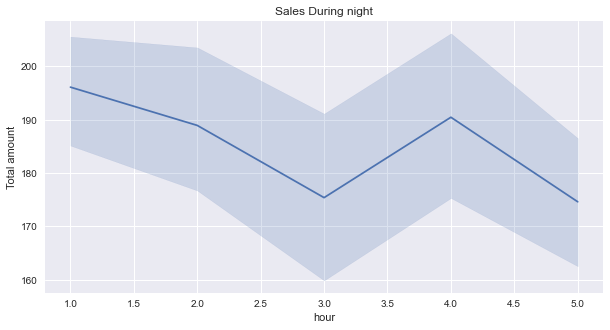

In [46]:
#visualizing sales distribution during night.
plt.figure(figsize = (10,5))
sns.lineplot(x = night["hour"], y = night["Total amount"])
plt.title('Sales During night');

In [47]:
#What products are mostly sold in night?
night_sale = night.groupby('Product')['Total amount'].sum()
night_sale

Product
20in Monitor                   32117.08
27in 4K Gaming Monitor        178615.42
27in FHD Monitor               88794.08
34in Ultrawide Monitor        154275.94
AA Batteries (4-pack)           6927.36
AAA Batteries (4-pack)          6524.18
Apple Airpods Headphones      171600.00
Bose SoundSport Headphones     89391.06
Flatscreen TV                 105000.00
Google Phone                  248400.00
LG Dryer                       19200.00
LG Washing Machine             25200.00
Lightning Charging Cable       25355.20
Macbook Pro Laptop            598400.00
ThinkPad Laptop               277997.22
USB-C Charging Cable           20219.40
Vareebadd Phone                55200.00
Wired Headphones               17817.14
iPhone                        348600.00
Name: Total amount, dtype: float64

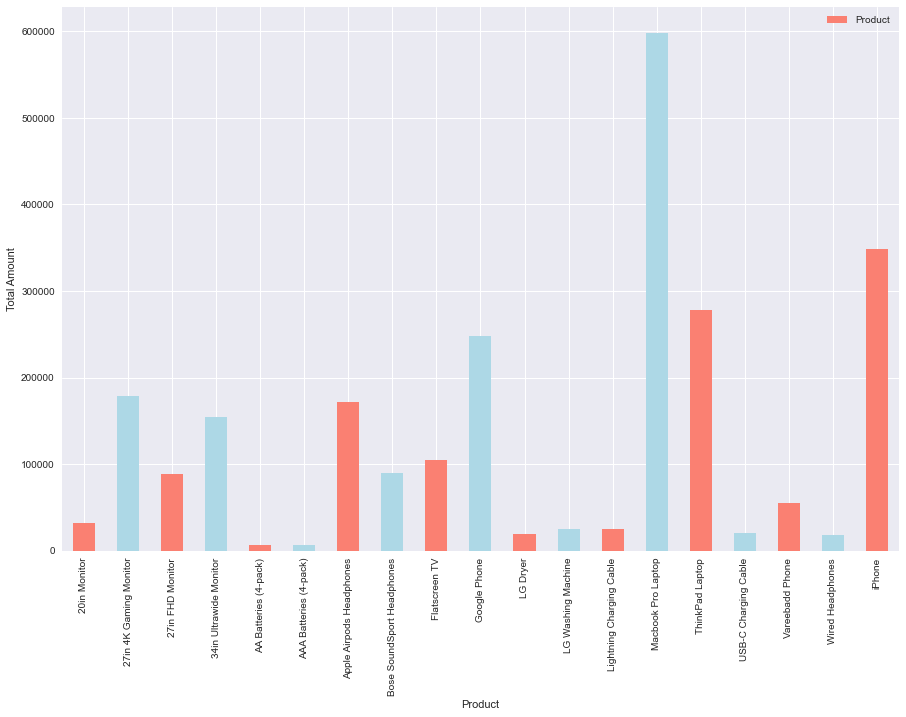

In [48]:
#Visualization.
night_sale.plot(kind = 'bar',figsize = (15,10),color = ['salmon','lightblue'])
plt.ylabel('Total Amount')
plt.legend(['Product'])
plt.xticks(rotation = 90);

* AAA Batteries are mostly sold product in night as well.

In [49]:
#Which time of day has the most sales?

mor = morning['Total amount'].sum().round(0)
print('Total sale in morning:  ',mor)

after = afternoon['Total amount'].sum().round(0)
print('Total sale in afternoon:',after)

even = evening['Total amount'].sum().round(0)
print('Total sale in evening:  ',even)

nigh = night['Total amount'].sum().round(0)
print('Total sale in night:     ',nigh)

Total sale in morning:   15642261.0
Total sale in afternoon: 20429150.0
Total sale in evening:   19047019.0
Total sale in night:      2469634.0


In [50]:
#loading inside dataframe.
group = pd.DataFrame({'Morning': mor, 'Afternoon' : after , 'Evening' : even , 'night' : nigh}, index = ["Accuracy"])
group

,Morning,Afternoon,Evening,night
Accuracy,15642261.0,20429150.0,19047019.0,2469634.0


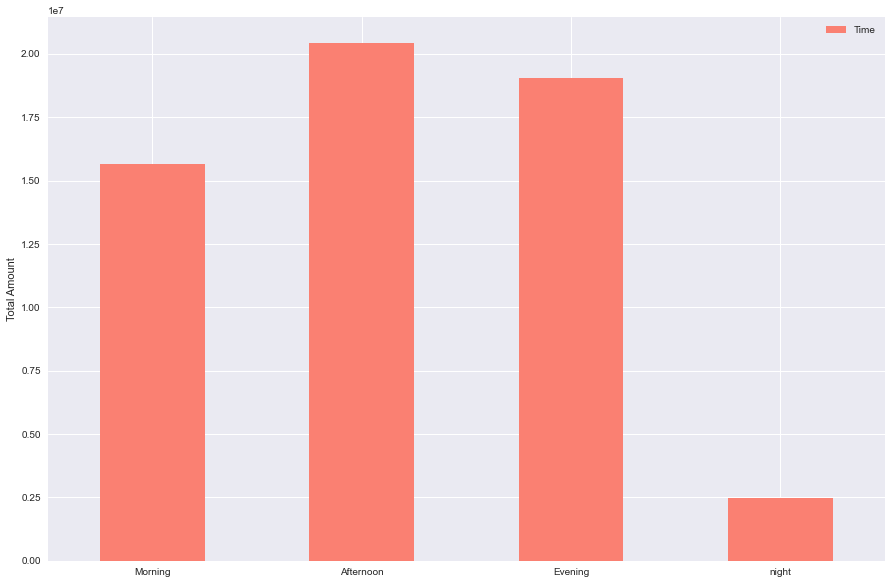

In [51]:
#Visualization.
group.T.plot(kind = 'bar',figsize = (15,10),color = ['salmon'])
plt.ylabel('Total Amount')
plt.legend(['Time'])
plt.xticks(rotation = 0);

* In Afternoon time period we get most amount of sale as compare to other time of the day. 

# 6. Find out the pair of products that are most sold together.

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
0,141234.0,iPhone,1.0,700.00,"944 Walnut St, Boston, MA 02215",22.0,1.0,2019.0,21.0,25.0,Boston,700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,"185 Maple St, Portland, OR 97035",28.0,1.0,2019.0,14.0,15.0,Portland,14.95
2,141236.0,Wired Headphones,2.0,11.99,"538 Adams St, San Francisco, CA 94016",17.0,1.0,2019.0,13.0,33.0,San Francisco,23.98
3,141237.0,27in FHD Monitor,1.0,149.99,"738 10th St, Los Angeles, CA 90001",5.0,1.0,2019.0,20.0,33.0,Los Angeles,149.99
4,141238.0,Wired Headphones,1.0,11.99,"387 10th St, Austin, TX 73301",25.0,1.0,2019.0,11.0,59.0,Austin,11.99


In [53]:
len(df['Order ID'])

372610

In [54]:
#droping duplicates from all columns including first.
df1 = df.drop_duplicates(keep = 'first')

In [55]:
len(df1['Order ID'])

185687

In [56]:
#it'll return all duplicated rows back.
df2 = df1[df1['Order ID'].duplicated(keep = False)]

In [57]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount
41,141275.0,USB-C Charging Cable,1.0,11.95,"610 Walnut St, Austin, TX 73301",7.0,1.0,2019.0,16.0,6.0,Austin,11.95
42,141275.0,Wired Headphones,1.0,11.99,"610 Walnut St, Austin, TX 73301",7.0,1.0,2019.0,16.0,6.0,Austin,11.99
57,141290.0,Apple Airpods Headphones,1.0,150.00,"4 1st St, Los Angeles, CA 90001",2.0,1.0,2019.0,8.0,25.0,Los Angeles,150.00
58,141290.0,AA Batteries (4-pack),3.0,3.84,"4 1st St, Los Angeles, CA 90001",2.0,1.0,2019.0,8.0,25.0,Los Angeles,11.52
133,141365.0,Vareebadd Phone,1.0,400.00,"20 Dogwood St, New York City, NY 10001",10.0,1.0,2019.0,11.0,19.0,New York City,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584.0,Wired Headphones,1.0,11.99,"537 Sunset St, Portland, OR 97035",11.0,12.0,2019.0,0.0,30.0,Portland,11.99
186773,319596.0,iPhone,1.0,700.00,"436 14th St, New York City, NY 10001",1.0,12.0,2019.0,8.0,44.0,New York City,700.00
186774,319596.0,Lightning Charging Cable,1.0,14.95,"436 14th St, New York City, NY 10001",1.0,12.0,2019.0,8.0,44.0,New York City,14.95
186809,319631.0,34in Ultrawide Monitor,1.0,379.99,"363 Highland St, Austin, TX 73301",17.0,12.0,2019.0,22.0,35.0,Austin,379.99


In [58]:
#Perfoming Group by to get pair of product.
df2['pair together'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df2.head()

<ipython-input-58-720e2bd573bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pair together'] = df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,day,month,year,hour,minute,City,Total amount,pair together
41,141275.0,USB-C Charging Cable,1.0,11.95,"610 Walnut St, Austin, TX 73301",7.0,1.0,2019.0,16.0,6.0,Austin,11.95,"USB-C Charging Cable,Wired Headphones"
42,141275.0,Wired Headphones,1.0,11.99,"610 Walnut St, Austin, TX 73301",7.0,1.0,2019.0,16.0,6.0,Austin,11.99,"USB-C Charging Cable,Wired Headphones"
57,141290.0,Apple Airpods Headphones,1.0,150.00,"4 1st St, Los Angeles, CA 90001",2.0,1.0,2019.0,8.0,25.0,Los Angeles,150.00,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290.0,AA Batteries (4-pack),3.0,3.84,"4 1st St, Los Angeles, CA 90001",2.0,1.0,2019.0,8.0,25.0,Los Angeles,11.52,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365.0,Vareebadd Phone,1.0,400.00,"20 Dogwood St, New York City, NY 10001",10.0,1.0,2019.0,11.0,19.0,New York City,400.00,"Vareebadd Phone,Wired Headphones"


In [59]:
#Find out the pair of products that are most sold together.
df3 = df2[['Order ID','pair together']]
df3

,Order ID,pair together
41,141275.0,"USB-C Charging Cable,Wired Headphones"
42,141275.0,"USB-C Charging Cable,Wired Headphones"
57,141290.0,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290.0,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365.0,"Vareebadd Phone,Wired Headphones"
...,...,...
186761,319584.0,"iPhone,Wired Headphones"
186773,319596.0,"iPhone,Lightning Charging Cable"
186774,319596.0,"iPhone,Lightning Charging Cable"
186809,319631.0,"34in Ultrawide Monitor,Lightning Charging Cable"


In [60]:
#Having a look at value count to find most sold pair.
pair_together = df3['pair together'].value_counts()
pair_together

iPhone,Lightning Charging Cable         1772
Google Phone,USB-C Charging Cable       1714
iPhone,Wired Headphones                  722
Vareebadd Phone,USB-C Charging Cable     624
Google Phone,Wired Headphones            606
                                        ... 
LG Dryer,Vareebadd Phone                   2
20in Monitor,iPhone                        2
Google Phone,27in 4K Gaming Monitor        2
LG Dryer,27in FHD Monitor                  2
ThinkPad Laptop,Vareebadd Phone            2
Name: pair together, Length: 350, dtype: int64

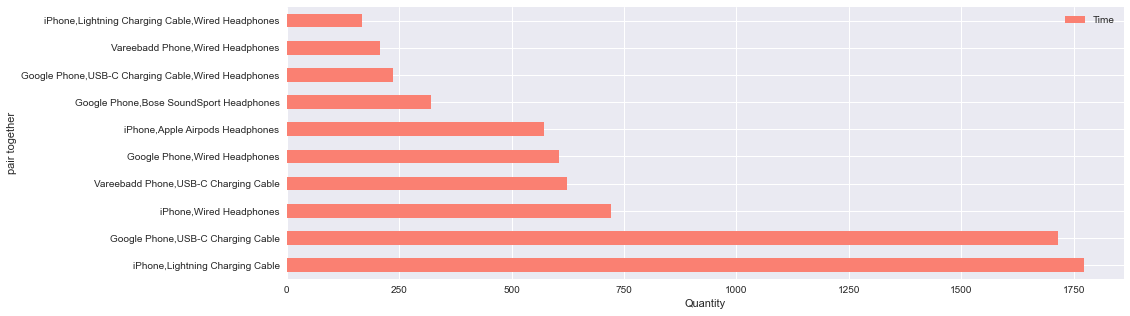

In [61]:
#Visualization.
pair_together.head(10).T.plot(kind = 'barh',figsize = (15,5),color = ['salmon'])
plt.xlabel("Quantity")
plt.ylabel('pair together')
plt.legend(['Time'])
plt.xticks(rotation = 0);

* iPhone,Lightning Charging Cable are the pair of products that are mostly sold together.